In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Data preprocessing steps and importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sb
import numpy as np
from imutils import paths
from skimage.io import imshow

In [3]:
bt_data = pd.read_csv('drive/MyDrive/Datasets/Question 4/Qn3_Braintumor/Brain_Tumor.csv')

bt_data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


(i) Data Cleaning:

In [4]:
bt_data = bt_data.dropna()

(ii) Eploratory Data Analysis:

In [5]:
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 470.2

In [6]:
bt_data.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [7]:
bt_data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [8]:
print(bt_data.corr())

                       Class      Mean  Variance  Standard Deviation  \
Class               1.000000 -0.095729  0.308818            0.285568   
Mean               -0.095729  1.000000  0.783027            0.790984   
Variance            0.308818  0.783027  1.000000            0.975699   
Standard Deviation  0.285568  0.790984  0.975699            1.000000   
Entropy            -0.778180 -0.099729 -0.344432           -0.345127   
Skewness            0.402644 -0.601593 -0.347399           -0.425428   
Kurtosis            0.239844 -0.358163 -0.248312           -0.329798   
Contrast            0.212643 -0.050974  0.135494            0.117981   
Energy             -0.862413 -0.014863 -0.335470           -0.331103   
ASM                -0.758255 -0.109393 -0.341061           -0.342530   
Homogeneity        -0.847529  0.095556 -0.290527           -0.288801   
Dissimilarity       0.556319 -0.113864  0.235487            0.224773   
Correlation        -0.108601  0.293693  0.288037            0.35

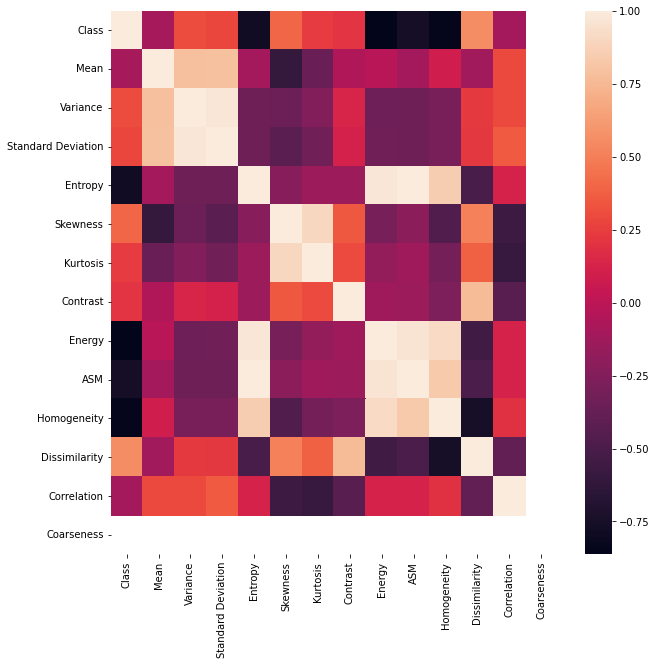

In [9]:
plt.figure(figsize=(10,10))
sb.heatmap(bt_data.corr())

(iii) Exploring Target Class(Tumor has or not)

Text(0, 0.5, 'Count')

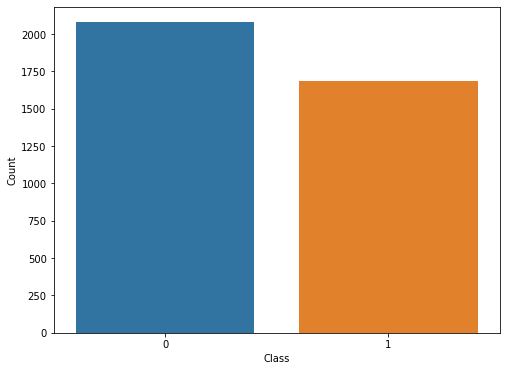

In [10]:
plt.figure(figsize=(8,6))

p = sb.barplot(x=np.unique(bt_data['Class']), y=bt_data['Class'].value_counts())
p.set_xlabel("Class", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)

2.Machine Learning Approach using Logistic Regression

In [11]:
X = bt_data.drop(['Class','Image'], axis = 1)
X

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [12]:
Y = bt_data['Class']
Y

0       0
1       0
2       1
3       1
4       0
       ..
3757    0
3758    0
3759    0
3760    0
3761    0
Name: Class, Length: 3762, dtype: int64

In [13]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [15]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [16]:
model = LogitRegression( learning_rate = 0.05, iterations = 5000 )
model.fit( X_train, Y_train )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [17]:
Y_pred = model.predict( X_test ) 
Y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
correctly_classified = 0    
# counter    

for count in range( np.size( Y_pred ) ) :      
    if Y_test[count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1

In [19]:
print( "Accuracy on test set :  %.2f"%((correctly_classified / count ) * 100) )

Accuracy on test set :  61.17


In [20]:
Y_test

array([0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.

3. Neural Network Approach using Normal ANN



In [21]:
def import_images(folder):
    images = []
    imagePaths = list(paths.list_images(folder))

    for (i,imagePath) in enumerate(imagePaths):
        img_1 = img.imread(imagePath)
        if img is not None:
            images.append(img_1)
        
    return images

In [22]:
bt_imgs = import_images('drive/MyDrive/Datasets/Question 4/Qn3_Braintumor/Brain Tumor')

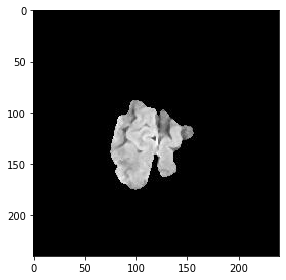

In [23]:
imshow(bt_imgs[1])

In [24]:
np.array(bt_imgs).shape

(3763, 240, 240, 3)

In [25]:
from skimage.color import rgb2gray
gray_imgs = []

for i in bt_imgs:
    gray_imgs.append(np.asarray(rgb2gray(i)))

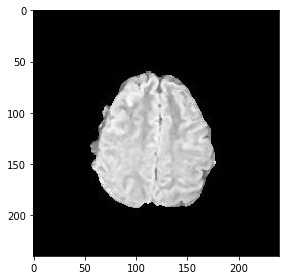

In [26]:
imshow(gray_imgs[0])

In [27]:
gray_imgs[0].shape

(240, 240)

In [28]:
new_Y = np.append(Y, 0)
new_Y

array([0., 0., 1., ..., 0., 0., 0.])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(np.asarray(gray_imgs), new_Y, test_size = 0.1)

In [30]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [34]:
model = Sequential()

model.add(Flatten(input_shape=(240,240)))

model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(200, activation='tanh'))

model.add(Dense(1,activation='sigmoid'))

In [35]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [36]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
85/85 [==============================] - 17s 193ms/step - loss: 0.7208 - accuracy: 0.5096 - val_loss: 0.6830 - val_accuracy: 0.5723
Epoch 2/10
85/85 [==============================] - 21s 253ms/step - loss: 0.7045 - accuracy: 0.5162 - val_loss: 0.6827 - val_accuracy: 0.5723
Epoch 3/10
85/85 [==============================] - 12s 144ms/step - loss: 0.6924 - accuracy: 0.5332 - val_loss: 0.6846 - val_accuracy: 0.5723
Epoch 4/10
85/85 [==============================] - 12s 146ms/step - loss: 0.6964 - accuracy: 0.5218 - val_loss: 0.6857 - val_accuracy: 0.5723
Epoch 5/10
85/85 [==============================] - 12s 145ms/step - loss: 0.6925 - accuracy: 0.5207 - val_loss: 0.6856 - val_accuracy: 0.5723
Epoch 6/10
85/85 [==============================] - 12s 144ms/step - loss: 0.6944 - accuracy: 0.5199 - val_loss: 0.6846 - val_accuracy: 0.5723
Epoch 7/10
85/85 [==============================] - 12s 144ms/step - loss: 0.6938 - accuracy: 0.5292 - val_loss: 0.6834 - val_accuracy: 0.5723

In [42]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 1s 106ms/step - loss: 0.6844 - accuracy: 0.5650


[0.6843883395195007, 0.5649867653846741]

Predicted: [[0.43337354]] Actual: 0.0


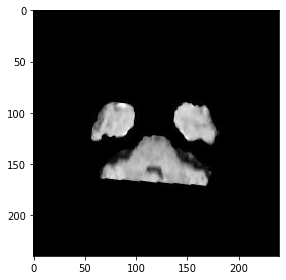

In [39]:
#prediction
i = 55
predict = model.predict(x_train[i].reshape(-1,240,240))

print("Predicted:",predict, "Actual:",y_train[i])

imshow(x_train[i])

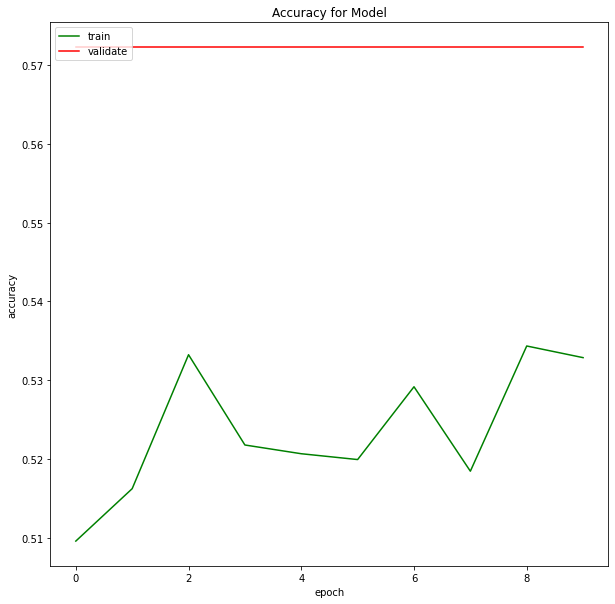

In [40]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], 'green')
plt.plot(history.history['val_accuracy'], 'red')
plt.title('Accuracy for Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')